In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

In [36]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [37]:
df.shape

(9994, 11)

In [38]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [39]:
df.State.unique()

array(['Tamil Nadu'], dtype=object)

In [40]:
df.City.nunique()

24

In [41]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


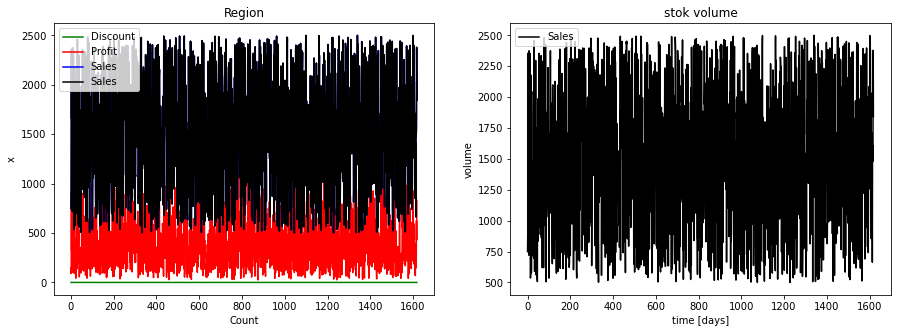

In [42]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.Region == 'South'].Discount.values, color='green', label='Discount')
plt.plot(df[df.Region == 'South'].Profit.values, color='red', label='Profit')
plt.plot(df[df.Region == 'South'].Sales.values, color='blue', label='Sales')
plt.plot(df[df.Region == 'South'].Sales.values, color='black', label='Sales')
plt.title('Region')
plt.xlabel('Count')
plt.ylabel('x')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df[df.Region == 'South'].Sales.values, color='black', label='Sales')
plt.title('stok volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

Text(0.5, 1.0, 'Persentase Pendapatan pada Kategori')

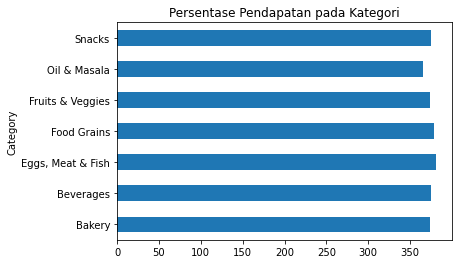

In [43]:
df.groupby("Category").mean()["Profit"].plot(kind='barh')
plt.title("Persentase Pendapatan pada Kategori")

Text(0.5, 1.0, 'Persentase Pendapatan pada Penjualan')

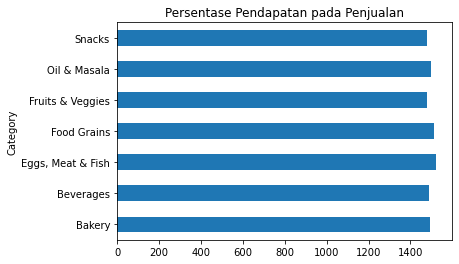

In [44]:
df.groupby("Category").mean()["Sales"].plot(kind='barh')
plt.title("Persentase Pendapatan pada Penjualan")

Text(0.5, 1.0, 'Pendapatan Berdasarkan Wilayah')

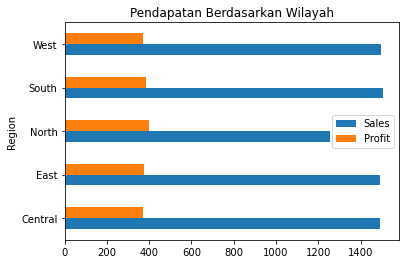

In [45]:
df.groupby("Region")[["Sales", "Profit"]].mean().plot(kind="barh")
plt.title("Pendapatan Berdasarkan Wilayah")

<AxesSubplot:ylabel='Region'>

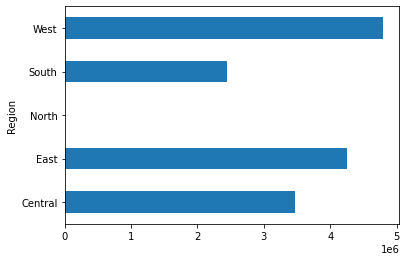

In [46]:
df.groupby("Region")["Sales"].sum().plot(kind="barh")

Text(0.5, 1.0, 'Keutungan dan Pendapatan Berdasarkan Kota')

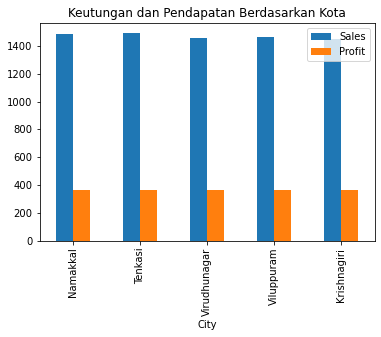

In [47]:
df.groupby("City")[["Sales", "Profit"]].mean().sort_values(by="Profit",ascending=True).head().plot(kind="bar")
plt.title("Keutungan dan Pendapatan Berdasarkan Kota")

Text(0.5, 1.0, 'Keutungan Per-tahun')

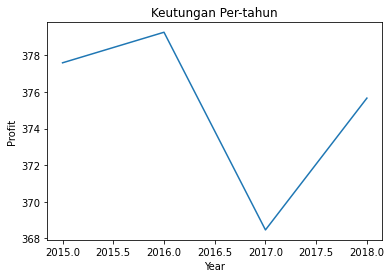

In [48]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Year"] = df["Order Date"].dt.year

plt.plot(df.groupby("Year")["Profit"].mean())
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Keutungan Per-tahun")

<AxesSubplot:xlabel='Year'>

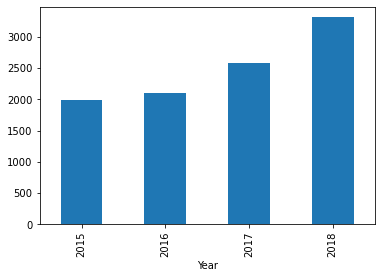

In [49]:
df.groupby("Year")["Sales"].count().plot(kind="bar")


In [50]:
df.groupby("Customer Name")["Year"].count().sort_values(ascending=False).head(10)

Customer Name
Amrish      227
Krithika    224
Verma       218
Arutra      218
Vidya       215
Shah        215
Suresh      212
Surya       209
Harish      208
Hussain     208
Name: Year, dtype: int64

Text(0.5, 1.0, "Top 3 Customer's contribution")

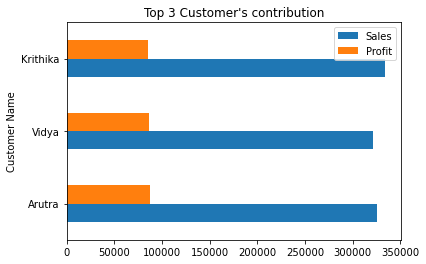

In [51]:
df.groupby("Customer Name")[["Sales", "Profit"]].sum().sort_values(by="Profit",ascending=False).head(3).plot(kind="barh").plot(kind="barh")
plt.title("Top 3 Customer's contribution")

Text(0.5, 1.0, 'Cities with most sales over the time.')

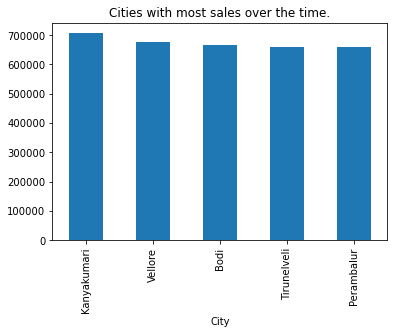

In [52]:
df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(5).plot(kind="bar")
plt.title("Cities with most sales over the time.")

Text(0.5, 1.0, 'Cities with highest avg Sales')

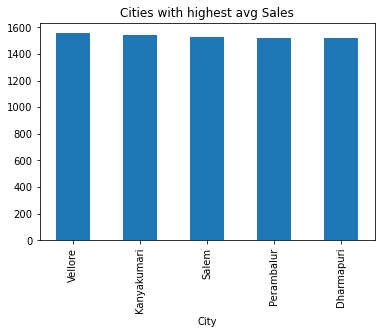

In [53]:
df.groupby("City")["Sales"].mean().sort_values(ascending=False).head(5).plot(kind="bar")
plt.title("Cities with highest avg Sales")

Text(0.5, 1.0, 'Cities with lowest avg Profit')

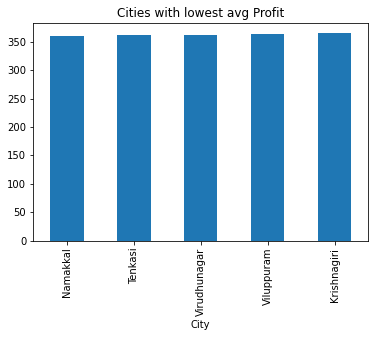

In [54]:
df.groupby("City")["Profit"].mean().sort_values(ascending=True).head(5).plot(kind="bar")
plt.title("Cities with lowest avg Profit")

Text(0.5, 1.0, 'Profit by Category')

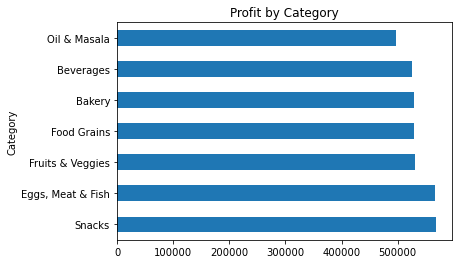

In [55]:
df.groupby("Category")["Profit"].sum().sort_values(ascending=False).plot(kind="barh")
plt.title("Profit by Category")

Text(0.5, 1.0, 'Discounts on categories')

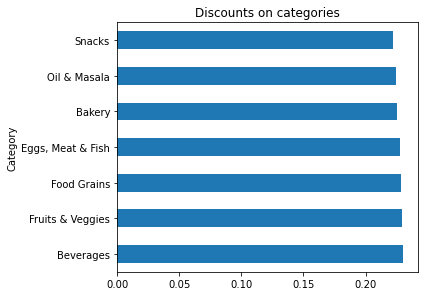

In [56]:
df.groupby("Category")["Discount"].mean().sort_values(ascending=False).plot(kind="barh")
plt.tight_layout()
plt.title("Discounts on categories")

In [57]:
df_schema = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df_schema

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


# Fuzzy Tsukamoto


tahapan 1 : Fuzzifikasi 
tahap ini merupakan merubah nilai crisp menjadi nilai fuzzy berupa himpunan yang memiliki derajat keanggotaan dengan rentang antara 0 hingga 1. 


- Variabel permintaan, terdiri dari himpunan fuzzy SEDIKIT , BANYAK
- Variabel persediaan, terdiri dari himpunan fuzzy SEDIKIT, BANYAK
- Variabel Penambahan, terdiri dari himpunan fuzzy BERKURANG, BERTAMBAH



In [59]:
import numpy as np

In [71]:
permintaan = np.arange(0,6000,1)
persediaan = np.arange(0,700,1)
penambahan = np.arange(0,9000,1)

In [72]:
permintaan_sd = fuzz.trapmf(permintaan,[0, 0, 1000, 5000])
permintaan_by = fuzz.trapmf(permintaan,[1000,5000,6000,6000])

persediaan_sd = fuzz.trapmf(persediaan,[0,0,100,600])
persediaan_by = fuzz.trapmf(persediaan,[100,600,700,700])

penambahan_kr = fuzz.trapmf(penambahan, [0,0,2000,7000])
penambahan_tb = fuzz.trapmf(penambahan,[2000,7000,9000,9000])

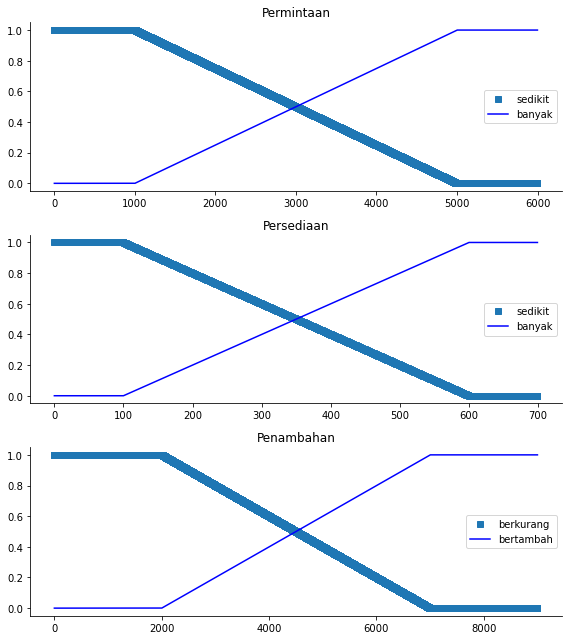

In [75]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

ax0.plot(permintaan, permintaan_sd, 's', linewidth=1.5, label='sedikit')
ax0.plot(permintaan, permintaan_by, 'b', linewidth=1.5, label='banyak')

ax0.set_title('Permintaan')
ax0.legend()

ax1.plot(persediaan, persediaan_sd,'s',linewidth=1.5, label='sedikit')
ax1.plot(persediaan, persediaan_by,'b',linewidth=1.5, label='banyak')

ax1.set_title('Persediaan')
ax1.legend()

ax2.plot(penambahan, penambahan_kr,'s',linewidth=1.5, label='berkurang')
ax2.plot(penambahan, penambahan_tb,'b',linewidth=1.5, label='bertambah')

ax2.set_title('Penambahan')
ax2.legend()

for ax in (ax0, ax1 , ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()

In [76]:
#menentukan input
minta = 4000
sedia = 300

#menentukan Rule Base 
"""
- R1, jika Permintaan Banyak AND Persediaan Banyak, maka Produksi Bertambah
- R2, jika Permintaan Sedikit AND Persediaan Sedikit, maka Produksi Berkurang
- R3, jika Permintaan Sedikit AND Persediaan Banyak, maka Produksi Berkurang
- R4, jika Permintaan Banyak AND Persediaan Sedikit, maka Produksi Bertambah

Domain Jumlah Penambahan:
- Berkurang -> (7000-Z)/(7000-2000)= fmin; apred[i] = fmin; (7000- Z) = 5000 * apred[i]; Z = 7000 - (5000 *apred[i])
- Bertambah -> (Z-2000)/(7000-2000)= fmin; apred[i] = fmin; (Z-2000) = 5000 * apred[i]; Z = 7000 - (5000 *apred[i])+2000

""";

In [81]:
#Derajat Keanggotaan
x = []
x.append(fuzz.interp_membership(permintaan, permintaan_sd, minta))
x.append(fuzz.interp_membership(permintaan, permintaan_by, minta))

y = []
y.append(fuzz.interp_membership(persediaan, persediaan_sd, sedia))
y.append(fuzz.interp_membership(persediaan_by, persediaan_by, sedia))

print("Derajat Keanggotaan Permintaan")
if x[0] > 0:
    print("Sedikit: "+str(x[0]))
if x[1] > 0:
    print("Banyak: "+str(x[1]))
    
print("Derajat Keanggotaan Persediaan")
if y[0] > 0:
    print("Sedikit: "+str(y[0]))
if y[1] > 0:
    print("Banyak: "+str(y[1]))

Derajat Keanggotaan Permintaan
Sedikit: 0.25
Banyak: 0.75
Derajat Keanggotaan Persediaan
Sedikit: 0.6


In [87]:
#Rule Base dan Interferensi Tsukamoto
apred1 = np.fmin(x[1], y[1])
print("Bertambah, nilai apred1 = ", apred1)
z1 = (apred1 * 5000) + 2000
print("Nilai z1 = ", z1)

apred2 = np.fmin(x[0], y[0])
print("Berkurang, nilai apred2 = ", apred2)
z2 = 7000 - (apred2 * 5000)
print("Nilai z2 = ", z2)

apred3 = np.fmin(x[0], y[1])
print("Berkurang, nilai apred3 = ", apred3)
z3 = 7000 - (apred3 * 5000)
print("Nilai z3 = ", z3)

apred4 = np.fmin(x[1], y[0])
print("Berkurang, nilai apred4 = ", apred4)
z4 = (apred4 * 5000) + 2000
print("Nilai z4 = ", z4)

Bertambah, nilai apred1 =  0.0
Nilai z1 =  2000.0
Berkurang, nilai apred2 =  0.25
Nilai z2 =  5750.0
Berkurang, nilai apred3 =  0.0
Nilai z3 =  7000.0
Berkurang, nilai apred4 =  0.6
Nilai z4 =  5000.0


In [88]:
#Defuzzifikasi
z = (apred1*z1 + apred2*z2 + apred3+z3 + apred4*z4)/(apred1+apred2+apred3+apred4)

In [89]:
print("Jumlah Stok barang sebanyak = ", z)

Jumlah Stok barang sebanyak =  13455.882352941177
